# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l2, l1
import matplotlib.pyplot as plt

# Load and preprocess data


In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
len(X_train)

50000

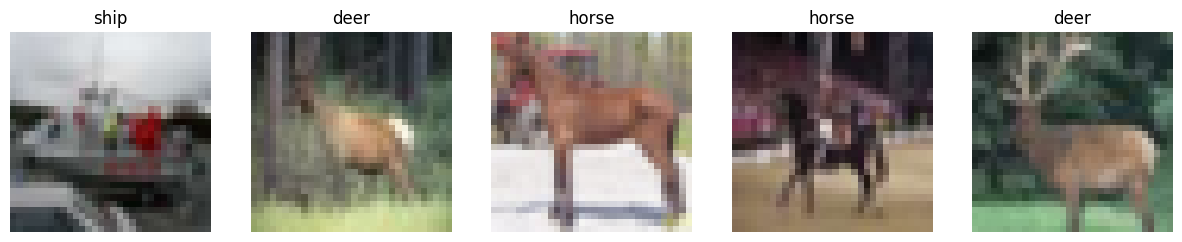

In [4]:
# Define the CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display a random image from the dataset and its label
def display_random_image(images, labels, position):
    idx = np.random.randint(0, len(images))
    plt.subplot(1, 5, position)
    plt.imshow(images[idx])
    plt.title(class_names[labels[idx][0]])
    plt.axis('off')

# Display 5 random images and their labels in a row
plt.figure(figsize=(15, 3))
for i in range(5):
    display_random_image(X_train, y_train, i + 1)
plt.show()

In [5]:
# Normalize the images
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Part 1: Different subset sizes with fixed model

In this part, I choose 1 hidden layer of 20 neurons. I imported 6 different sets of data (500, 1000, 5000, 12500, 25000, 50000) into this model for training. 

In [6]:
# Define the sizes of the subsets
subset_sizes = [500, 1000, 5000, 12500, 25000, 50000]

# Create the subsets
subsets = []
for size in subset_sizes:
    subsets.append((X_train[:size], y_train[:size]))

In [7]:
model = Sequential()
model.add(Dense(20, activation='relu'))

model.add(Flatten()) # Flatten layer
model.add(Dense(10, activation='softmax')) # Output layer consists of 10 neurons for 10 classes and use softmax activation function

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # Adam optimizer and categorical cross-entropy loss function

In [8]:
# Train and evaluate the model on each subset
test_accuracy_list = []
for i, subset in enumerate(subsets):
    # Train the model on the current subset
    history = model.fit(subset[0], subset[1], batch_size=64, epochs=10, validation_data=(X_test, y_test))
    
    # Evaluate the model on the full training set and test set
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy_list.append(test_acc)
    # Print the results
    print("Subset size:", subset_sizes[i])
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)

Epoch 1/10


2023-05-05 19:37:13.640120: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 1s 101ms/step - loss: 2.6872 - accuracy: 0.1240 - val_loss: 2.4453 - val_accuracy: 0.1556
Epoch 2/10
8/8 [==============================] - 0s 38ms/step - loss: 2.2509 - accuracy: 0.1980 - val_loss: 2.2237 - val_accuracy: 0.2424
Epoch 3/10
8/8 [==============================] - 0s 38ms/step - loss: 2.0579 - accuracy: 0.3180 - val_loss: 2.1065 - val_accuracy: 0.2447
Epoch 4/10
8/8 [==============================] - 0s 45ms/step - loss: 1.9158 - accuracy: 0.2660 - val_loss: 2.0365 - val_accuracy: 0.2640
Epoch 5/10
8/8 [==============================] - 0s 49ms/step - loss: 1.7878 - accuracy: 0.3800 - val_loss: 2.0536 - val_accuracy: 0.2832
Epoch 6/10
8/8 [==============================] - 0s 42ms/step - loss: 1.6910 - accuracy: 0.4080 - val_loss: 1.9637 - val_accuracy: 0.3034
Epoch 7/10
8/8 [==============================] - 0s 59ms/step - loss: 1.6210 - accuracy: 0.4360 - val_loss: 2.0064 - val_accuracy: 0.3051
Epoch 8/10
8/8 [=====================

In [9]:
print(test_accuracy_list)

[0.302700012922287, 0.3416999876499176, 0.40470001101493835, 0.4296000003814697, 0.44749999046325684, 0.4641999900341034]


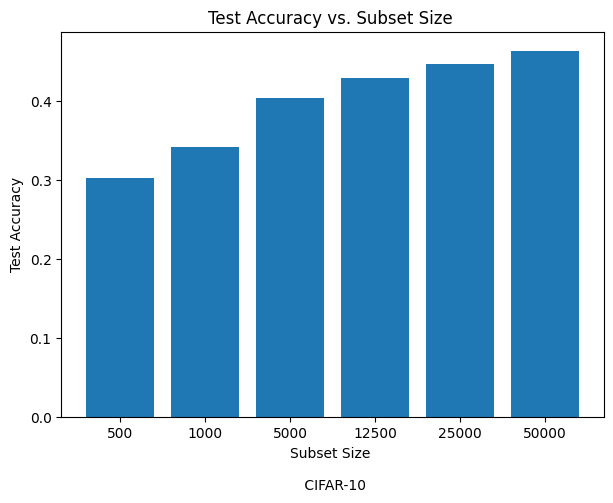

In [10]:
# Define the x-axis labels
labels = ['500', '1000', '5000', '12500', '25000', '50000']

plt.figure(figsize=(7, 5))
# Plot the test accuracy values as a bar chart
plt.bar(labels, test_accuracy_list)

# Add axis labels and a title
plt.xlabel('Subset Size \n\n CIFAR-10')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Subset Size ')

# Display the plot
plt.show()

# Part 2: Different subset sizes with different neuron numbers

In this part, I use the same sets of data (500, 1000, 5000, 12500, 25000, 50000) and another set of neurons (128, 64, 32, 16, 8, 4) to feed into the model to observe the change of model performance accross various dataset and neuron numbers. 

In [11]:
# Define the sizes of the subsets
subset_sizes = [500, 1000, 5000, 12500, 25000, 50000]
num_neurons = [160, 80, 40, 20, 10, 5]

subsets = []
for size in subset_sizes:
    subsets.append((X_train[:size], y_train[:size]))

test_accuracy_list = []

for i, subset in enumerate(subsets):
    # Update the number of neurons in the Conv2D layer
    model = Sequential()
    model.add(Dense(num_neurons[i], activation='relu'))

    model.add(Flatten()) # Flatten layer
    # model.add(Dense(num_neurons[i], activation='relu'))
    model.add(Dense(10, activation='softmax')) # Output layer consists of 10 neurons for 10 classes and use softmax activation function
    # model.summary()
    
    # Compile and train model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current subset
    history = model.fit(subset[0], subset[1], batch_size=64, epochs=10, validation_data=(X_test, y_test))
    
    # Evaluate the model on the full training set and test set
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy_list.append(test_acc)
    
    # Print the results
    print("Subset size:", subset_sizes[i])
    print("Num neurons:", num_neurons[i])
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)


Epoch 1/10
8/8 [==============================] - 2s 211ms/step - loss: 4.1250 - accuracy: 0.1300 - val_loss: 3.9280 - val_accuracy: 0.1650
Epoch 2/10
8/8 [==============================] - 1s 195ms/step - loss: 2.6144 - accuracy: 0.2420 - val_loss: 2.5952 - val_accuracy: 0.2549
Epoch 3/10
8/8 [==============================] - 1s 196ms/step - loss: 1.9686 - accuracy: 0.3200 - val_loss: 2.1942 - val_accuracy: 0.2691
Epoch 4/10
8/8 [==============================] - 1s 196ms/step - loss: 1.8261 - accuracy: 0.4000 - val_loss: 2.0277 - val_accuracy: 0.3049
Epoch 5/10
8/8 [==============================] - 1s 195ms/step - loss: 1.5459 - accuracy: 0.4520 - val_loss: 1.9034 - val_accuracy: 0.3247
Epoch 6/10
8/8 [==============================] - 1s 196ms/step - loss: 1.3444 - accuracy: 0.5700 - val_loss: 1.9010 - val_accuracy: 0.3318
Epoch 7/10
8/8 [==============================] - 1s 196ms/step - loss: 1.1727 - accuracy: 0.6320 - val_loss: 1.8909 - val_accuracy: 0.3462
Epoch 8/10
8/8 [====

In [12]:
print(test_accuracy_list)

[0.3391000032424927, 0.3677999973297119, 0.4092999994754791, 0.44999998807907104, 0.45260000228881836, 0.42989999055862427]


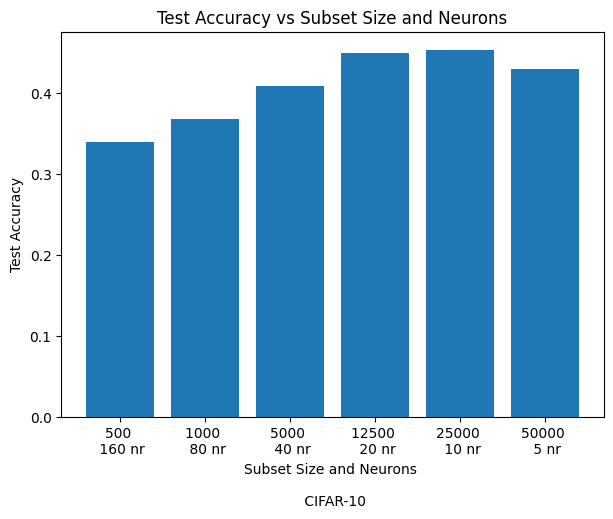

In [13]:
# Define the x-axis labels
labels = ['500 \n 160 nr', '1000 \n 80 nr', '5000 \n 40 nr', '12500 \n 20 nr', '25000 \n 10 nr', '50000 \n 5 nr']

plt.figure(figsize=(7, 5))
# Plot the test accuracy values as a bar chart
plt.bar(labels, test_accuracy_list)

# Add axis labels and a title
plt.xlabel('Subset Size and Neurons \n\n CIFAR-10')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Subset Size and Neurons')

# Display the plot
plt.show()

# Part 3: Different numbers of layers on a fixed dataset

In part 3, I use the fixed training set of CIFAR-10 with 50000 samples to train it in multiple models with fixed total neuron number (32) and different layers (1,2,4)

In [14]:
test_accuracy_list = []
# Define the models
def create_model_1(input_shape=(32, 32, 3)): # 1 layer x 32 neurons
    model = Sequential([
        Dense(20, activation='relu'),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_2(input_shape=(32, 32, 3)): # 2 layers x 16 neurons
    model = Sequential([
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_3(input_shape=(32, 32, 3)): # 4 layers x 8 neurons
    model = Sequential([
        Dense(5, activation='relu'),
        Dense(5, activation='relu'),
        Dense(5, activation='relu'),
        Dense(5, activation='relu'),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

models = [create_model_1(), create_model_2(), create_model_3()]

# Train and evaluate each model
history_list = []

for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), verbose=2)
    # Evaluate the model on the test set
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy_list.append(test_acc)


Epoch 1/10
782/782 - 3s - loss: 1.7756 - accuracy: 0.3870 - val_loss: 1.6270 - val_accuracy: 0.4295 - 3s/epoch - 4ms/step
Epoch 2/10
782/782 - 3s - loss: 1.5964 - accuracy: 0.4481 - val_loss: 1.5766 - val_accuracy: 0.4476 - 3s/epoch - 4ms/step
Epoch 3/10
782/782 - 3s - loss: 1.5449 - accuracy: 0.4632 - val_loss: 1.5359 - val_accuracy: 0.4656 - 3s/epoch - 4ms/step
Epoch 4/10
782/782 - 3s - loss: 1.5068 - accuracy: 0.4770 - val_loss: 1.5191 - val_accuracy: 0.4739 - 3s/epoch - 4ms/step
Epoch 5/10
782/782 - 2s - loss: 1.4729 - accuracy: 0.4887 - val_loss: 1.5132 - val_accuracy: 0.4737 - 2s/epoch - 3ms/step
Epoch 6/10
782/782 - 2s - loss: 1.4466 - accuracy: 0.4980 - val_loss: 1.4889 - val_accuracy: 0.4848 - 2s/epoch - 3ms/step
Epoch 7/10
782/782 - 2s - loss: 1.4239 - accuracy: 0.5058 - val_loss: 1.4715 - val_accuracy: 0.4843 - 2s/epoch - 3ms/step
Epoch 8/10
782/782 - 2s - loss: 1.4034 - accuracy: 0.5142 - val_loss: 1.5045 - val_accuracy: 0.4730 - 2s/epoch - 3ms/step
Epoch 9/10
782/782 - 2s 

In [15]:
# test_accuracy_list.reverse()
print(test_accuracy_list)

[0.48510000109672546, 0.46700000762939453, 0.42500001192092896]


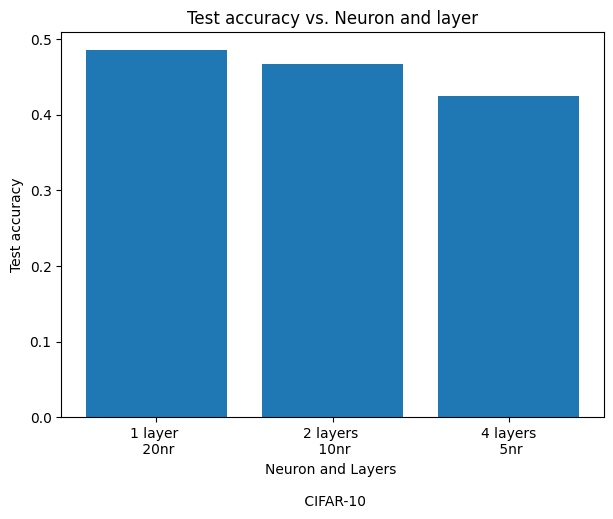

In [16]:
# Define the x-axis labels
labels = ['1 layer \n 20nr', '2 layers \n 10nr', '4 layers\n 5nr']

plt.figure(figsize=(7, 5))
# Plot the test accuracy values as a bar chart
plt.bar(labels, test_accuracy_list)

# Add axis labels and a title
plt.xlabel('Neuron and Layers \n\n CIFAR-10')
plt.ylabel('Test accuracy')
plt.title('Test accuracy vs. Neuron and layer')

# Display the plot
plt.show()

# Part 4: Different type of regularizer on a fixed dataset

In part 4, I use the fixed training set of CIFAR-10 with 50000 samples to train it in  models with fixed total neuron number (20) and different regularizers

In [17]:
test_accuracy_list = []
# Define the models
def create_model_0(input_shape=(32, 32, 3)): # No regularizer
    model = Sequential([
        Dense(20, activation='relu'),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model
def create_model_1(input_shape=(32, 32, 3)): # L1 regularizer with 0.001 strength
    model = Sequential([
        Dense(20, activation='relu',kernel_regularizer=l1(0.001)),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_2(input_shape=(32, 32, 3)): # L2 regularizer with 0.001 strength
    model = Sequential([
        Dense(20, activation='relu',kernel_regularizer=l2(0.001)),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_3(input_shape=(32, 32, 3)): # Dropout layer with 0.5 dropout ratio
    model = Sequential([
        Dense(20, activation='relu'),
        Dropout(0.5),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

models = [create_model_0(), create_model_1(), create_model_2(), create_model_3()]

# Train and evaluate each model
history_list = []

for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), verbose=2)
    # Evaluate the model on the test set
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy_list.append(test_acc)


Epoch 1/10
782/782 - 3s - loss: 1.7240 - accuracy: 0.3968 - val_loss: 1.5980 - val_accuracy: 0.4370 - 3s/epoch - 4ms/step
Epoch 2/10
782/782 - 3s - loss: 1.5666 - accuracy: 0.4552 - val_loss: 1.5651 - val_accuracy: 0.4528 - 3s/epoch - 3ms/step
Epoch 3/10
782/782 - 3s - loss: 1.5185 - accuracy: 0.4755 - val_loss: 1.5190 - val_accuracy: 0.4715 - 3s/epoch - 3ms/step
Epoch 4/10
782/782 - 2s - loss: 1.4847 - accuracy: 0.4873 - val_loss: 1.5091 - val_accuracy: 0.4701 - 2s/epoch - 3ms/step
Epoch 5/10
782/782 - 2s - loss: 1.4594 - accuracy: 0.4951 - val_loss: 1.5067 - val_accuracy: 0.4776 - 2s/epoch - 3ms/step
Epoch 6/10
782/782 - 2s - loss: 1.4376 - accuracy: 0.5014 - val_loss: 1.5011 - val_accuracy: 0.4723 - 2s/epoch - 3ms/step
Epoch 7/10
782/782 - 2s - loss: 1.4138 - accuracy: 0.5111 - val_loss: 1.5184 - val_accuracy: 0.4679 - 2s/epoch - 3ms/step
Epoch 8/10
782/782 - 2s - loss: 1.3998 - accuracy: 0.5154 - val_loss: 1.4794 - val_accuracy: 0.4829 - 2s/epoch - 3ms/step
Epoch 9/10
782/782 - 3s 

In [18]:
test_accuracy_list

[0.47839999198913574,
 0.47839999198913574,
 0.4771000146865845,
 0.48899999260902405]

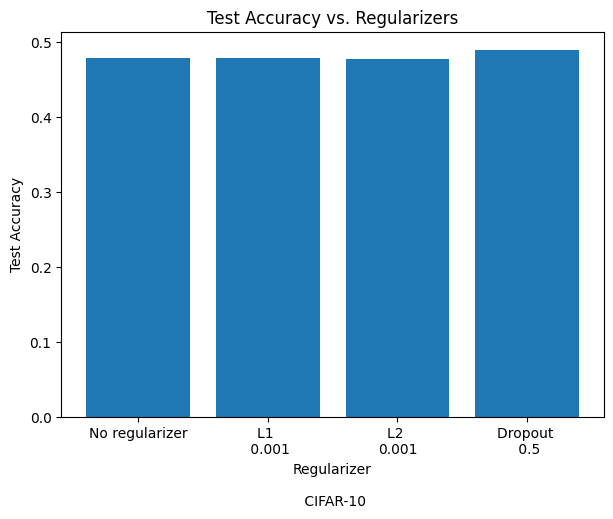

In [19]:
# Define the x-axis labels
labels = ['No regularizer','L1 \n 0.001', 'L2 \n0.001', 'Dropout \n 0.5']

# Plot the test accuracy values as a bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, test_accuracy_list)

# Add axis labels and a title
plt.xlabel('Regularizer\n \n CIFAR-10')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Regularizers')

# Display the plot
plt.show()